<a href="https://colab.research.google.com/github/jefersonjlima/2dof-arm/blob/master/notebook/Robotic_Arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import sin, cos
from numpy.linalg import inv
import matplotlib.pylab as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Define Integration Method

The most widely known member of the Runge–Kutta family is generally referred to as "RK4", the "classic Runge–Kutta method" or simply as "the Runge–Kutta method". [<sup>1</sup>](https://codereview.stackexchange.com/questions/163499/ode45-solver-implementation-in-python)

In [0]:
def ode45_step(f, x, t, dt, *args):
    """
    One step of 4th Order Runge-Kutta method
    """
    k = dt
    k1 = k * f(t, x, *args)
    k2 = k * f(t + 0.5*k, x + 0.5*k1, *args)
    k3 = k * f(t + 0.5*k, x + 0.5*k2, *args)
    k4 = k * f(t + dt, x + k3, *args)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)

def ode45(f, t, x0, *args):
    """
    4th Order Runge-Kutta method
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i] 
        x[i+1] = ode45_step(f, x[i], t[i], dt, *args)
    return x

# Model

In [0]:
# parameters
L1 = 1
L2 = 1
M1 = 1
M2 = 1
g = 9.8

def robot(t,X):
    '''
    2 DOF Robot Model
        q1 = theta1
        q2 = theta2
    '''
    # states
    q1  = X[0]
    q2  = X[1]
    dq1 = X[2] 
    dq2 = X[3]

    # Inertial matrix
    Bq = np.array([
                [(M1+M2)*L1**2+M2*L2**2+2*M2*L1*L2*cos(q2)  ,  M2*L2**2+M2*L1*L2*cos(q2)],
                [M2*L2**2+M2*L1*L2*cos(q2)                  , M2*L2**2]
                    ]) 
    # C Matrix
    Cq = np.array([
                    [-M2*L1*L2*sin(q2)*(2*dq1*dq2+dq2**2)],
                    [-M2*L1*L2*sin(q2)*dq1*dq2]
                    ])
    # Gravitational matrix 
    Gq = np.array([
                    [-(M1+M2)*g*L1*sin(q1)-M2*g*L2*sin(q1+q2)],
                    [-M2*g*L2*sin(q1+q2)]
                   ])

    # Model
    xdot = np.zeros(4,)
    #dinamic
    q2dot = inv(Bq).dot(-Cq-Gq)

    # states
    xdot[0] = dq1
    xdot[1] = dq2
    xdot[2] = q2dot[0]
    xdot[3] = q2dot[1]
    
    return xdot

# Simulation

In [0]:
# int
x0 = np.array([np.pi/3, 0, 0, 0])
t0 = 0; tf = 20; steps = 1000

t = np.linspace(t0, tf, steps)
X = ode45(robot, t, x0)

In [0]:
# states
q1  = X[:,0]
q2  = X[:,1]
dq1 = X[:,2] 
dq2 = X[:,3]

# plot
x1=L1*sin(q1)
y1=L1*np.cos(q1)
x2=L1*sin(q1)+L2*sin(q1+q2)
y2=L1*cos(q1)+L2*cos(q1+q2)

# Animation

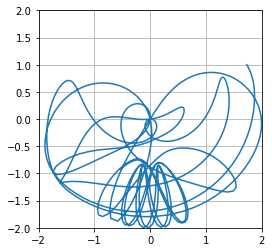

In [16]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
plt.plot(x2,y2)


line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
#    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(X)),
                              interval=25, blit=True, init_func=init);

In [17]:
HTML(ani.to_html5_video())